# Data Analysis of Biochemical factors that influence Body Mass Index

### Source: NHANES

In [2]:
import xport
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
file_loc = '../nhanes_data_files/'
df_demog_2017_2018 = pd.read_sas(file_loc + 'DEMO_J_2017_2018.xpt')
df_ghb_2017_2018 = pd.read_sas(file_loc +'GHB_J_2017_2018.xpt')
df_I_2017_2018 = pd.read_sas(file_loc +'INS_J_2017_2018.xpt')
df_DXX_2017_2018 = pd.read_sas(file_loc +'DXX_J_2017_2018.xpt')
df_BMX_2017_2018 = pd.read_sas(file_loc +'BMX_J_2017_2018.xpt')
df_glu_2017_2018 = pd.read_sas(file_loc +'GLU_J_2017_2018.xpt')
df_LUX_2017_2018 = pd.read_sas(file_loc + 'LUX_J_2017_2018.xpt')

df_HDL_2017_2018 = pd.read_sas(file_loc +'HDL_J_2017_2018.xpt')
df_TCHOL_2017_2018 = pd.read_sas(file_loc +'TCHOL_J_2017_2018.xpt')
df_TRIGLY_2017_2018 = pd.read_sas(file_loc +'TRIGLY_J_2017_2018.xpt')

df_CBC_2017_2018 = pd.read_sas(file_loc +'CBC_J_2017_2018.xpt')
df_HSCRP_2017_2018 = pd.read_sas(file_loc +'HSCRP_J_2017_2018.xpt')
df_BIOPRO_2017_2018 = pd.read_sas(file_loc +'BIOPRO_J_2017_2018.xpt')

# df_PAQ_2017_2018 = pd.read_sas(file_loc +'PAQ_J_2017_2018.xpt')
# df_DBQ_2017_2018 = pd.read_sas(file_loc +'DBQ_J_2017_2018.xpt')

In [5]:
df_DXX_2017_2018.head(2)

,SEQN,DXAEXSTS,DXAHEBV,DXXHEA,DXXHEBMC,DXXHEBMD,DXAHETV,DXXHEFAT,DXDHELE,DXXHELI,...,DXDSTTOT,DXDSTPF,DXDTOA,DXDTOBMC,DXDTOBMD,DXDTOFAT,DXDTOLE,DXDTOLI,DXDTOTOT,DXDTOPF
0,93706.0,1.0,5.397605e-79,230.99,370.17,1.603,5.397605e-79,1149.1,3186.6,3556.7,...,61125.9,22.6,2083.82,2097.87,1.007,14968.3,48765.6,50863.5,65831.7,22.7
1,93707.0,1.0,5.397605e-79,223.45,324.64,1.453,5.397605e-79,977.9,2719.5,3044.1,...,41271.5,18.5,1666.11,1467.06,0.881,8602.0,35224.5,36691.6,45293.6,19.0


In [4]:
dfage_2017_2018=df_demog_2017_2018[['SEQN','RIDAGEYR']].copy()
dfbmi=df_BMX_2017_2018[['SEQN','BMXWT','BMXBMI','BMXWAIST']].copy()
df_merge=dfage_2017_2018.merge(dfbmi,on='SEQN')
df_merge=df_merge.merge(df_LUX_2017_2018[['SEQN','LUXSMED','LUXCAPM']],on='SEQN')
df_merge=df_merge.merge(df_DXX_2017_2018[['SEQN','DXDTRPF','DXDTOPF','DXDTOLI']],on='SEQN')
df_merge=df_merge.merge(df_HSCRP_2017_2018[['SEQN','LBXHSCRP']],on='SEQN')
df_merge=df_merge.merge(df_CBC_2017_2018[['SEQN','LBXWBCSI']],on='SEQN')

df_merge=df_merge.merge(df_TCHOL_2017_2018[['SEQN','LBXTC']],on='SEQN')
df_merge=df_merge.merge(df_HDL_2017_2018[['SEQN','LBDHDD']],on='SEQN')
df_merge=df_merge.merge(df_TRIGLY_2017_2018[['SEQN','LBDLDL','LBXTR']],on='SEQN')

df_merge=df_merge.merge(df_I_2017_2018[['SEQN','LBXIN']],on='SEQN')
df_merge['loge_LBXIN']=np.log(df_merge['LBXIN'])
df_merge=df_merge.merge(df_glu_2017_2018[['SEQN','LBXGLU']],on='SEQN')
df_merge=df_merge.merge(df_ghb_2017_2018[['SEQN','LBXGH']],on='SEQN')
df_merge['loge_LBXGH']=np.log(df_merge['LBXGH'])
df_merge.shape

(2066, 21)

In [13]:
# df_merge_20=df_merge[df_merge['RIDAGEYR']>11]
# df_merge_20.shape

In [5]:
par=df_merge.columns[1:].tolist()
# par1=['RIDAGEYR']

In [6]:
df_merge[par].describe()

,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,LUXSMED,LUXCAPM,DXDTRPF,DXDTOPF,DXDTOLI,LBXHSCRP,LBXWBCSI,LBXTC,LBDHDD,LBDLDL,LBXTR,LBXIN,loge_LBXIN,LBXGLU,LBXGH,loge_LBXGH
count,2066.000000,2036.000000,2034.000000,1973.000000,1963.000000,1963.000000,1575.000000,1446.000000,1446.000000,1917.000000,1973.000000,1927.000000,1927.000000,1782.000000,1805.000000,1916.00000,1916.000000,1963.000000,1966.000000,1966.000000
mean,34.104550,80.413703,28.711898,95.297618,5.642995,251.945492,30.947619,32.568050,51409.082019,3.722415,6.797263,180.250130,52.743643,107.508979,105.766759,14.00976,2.332094,106.499745,5.580061,1.708940
std,14.715205,24.614470,8.012518,18.836110,4.692754,64.702192,9.425974,8.939819,12678.597315,7.711427,2.087481,39.897451,14.817536,33.430305,109.759086,15.66300,0.745718,31.661989,0.931293,0.133827
min,12.000000,30.700000,14.600000,59.200000,1.700000,100.000000,10.100000,12.500000,21608.400000,0.110000,2.300000,79.000000,11.000000,27.000000,10.000000,0.71000,-0.342490,47.000000,4.100000,1.410987
25%,20.000000,63.100000,23.000000,80.700000,4.000000,205.000000,23.850000,25.825000,41339.750000,0.670000,5.400000,152.000000,42.000000,85.000000,54.000000,6.32000,1.843719,94.000000,5.200000,1.648659
50%,33.000000,76.600000,27.300000,93.700000,4.800000,245.000000,31.400000,32.400000,50448.700000,1.540000,6.500000,176.000000,50.000000,104.000000,80.000000,9.98500,2.301084,100.000000,5.400000,1.686399
75%,47.000000,93.425000,32.900000,106.500000,6.000000,295.000000,38.350000,39.900000,59769.375000,3.880000,7.900000,204.000000,60.000000,127.000000,124.000000,16.47000,2.801541,107.000000,5.700000,1.740466
max,59.000000,242.600000,86.200000,169.500000,75.000000,400.000000,54.300000,53.900000,105724.600000,138.810000,22.800000,446.000000,178.000000,354.000000,2684.000000,267.22000,5.588072,451.000000,13.900000,2.631889


<AxesSubplot:>

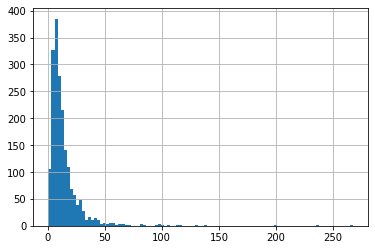

In [16]:
df_merge['LBXIN'].hist(bins=100)

<AxesSubplot:>

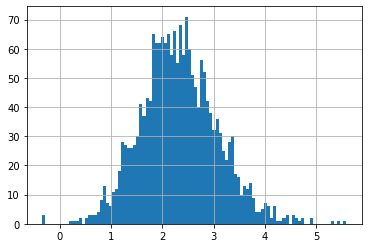

In [17]:
df_merge['loge_LBXIN'].hist(bins=100)

<AxesSubplot:>

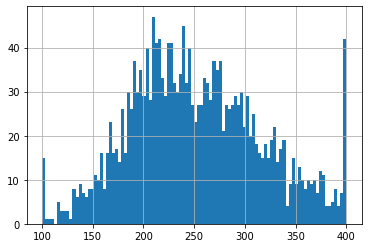

In [18]:
df_merge['LUXCAPM'].hist(bins=100)

In [19]:
# np.log(7)

In [7]:
#BMXWAIST,LUXCAPM,DXDTRPF,LBXGH most strongly correlated with Age than rest
#LBXIN most strongly correlated with BMXBMI,LUXCAPM,DXDTRPF than LBXGH

#BMXBMI most strongly associated with LBXIN (ketodiet helps?)
df_merge[par].corr()

,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,LUXSMED,LUXCAPM,DXDTRPF,DXDTOPF,DXDTOLI,LBXHSCRP,LBXWBCSI,LBXTC,LBDHDD,LBDLDL,LBXTR,LBXIN,loge_LBXIN,LBXGLU,LBXGH,loge_LBXGH
RIDAGEYR,1.000000,0.233785,0.250366,0.362907,0.069931,0.328211,0.300190,0.199282,0.179561,0.153028,0.062187,0.410792,0.033299,0.351179,0.207625,-0.003002,-0.032099,0.265285,0.329513,0.363288
BMXWT,0.233785,1.000000,0.915214,0.922111,0.318863,0.586017,0.493972,0.387358,0.852973,0.296618,0.257250,0.099617,-0.334370,0.156982,0.190883,0.384433,0.493932,0.229666,0.239851,0.256534
BMXBMI,0.250366,0.915214,1.000000,0.931997,0.311533,0.601358,0.707275,0.625751,0.614807,0.339442,0.307382,0.114041,-0.301165,0.165132,0.181276,0.409285,0.545452,0.230137,0.264180,0.286467
BMXWAIST,0.362907,0.922111,0.931997,1.000000,0.272782,0.657268,0.688211,0.572648,0.662746,0.314468,0.323924,0.171064,-0.322829,0.204963,0.233709,0.393984,0.532645,0.272123,0.297915,0.319306
LUXSMED,0.069931,0.318863,0.311533,0.272782,1.000000,0.263206,0.090133,0.067693,0.171129,0.150611,0.077334,-0.006419,-0.089894,0.008087,0.069657,0.266015,0.209458,0.168575,0.149778,0.156968
LUXCAPM,0.328211,0.586017,0.601358,0.657268,0.263206,1.000000,0.485789,0.361041,0.418280,0.194705,0.255542,0.188309,-0.289162,0.176326,0.289909,0.352140,0.474186,0.325045,0.330967,0.354787
DXDTRPF,0.300190,0.493972,0.707275,0.688211,0.090133,0.485789,1.000000,0.957347,0.014863,0.251369,0.293421,0.217928,-0.128137,0.221986,0.114661,0.294290,0.466649,0.164171,0.196380,0.218813
DXDTOPF,0.199282,0.387358,0.625751,0.572648,0.067693,0.361041,0.957347,1.000000,-0.131132,0.240888,0.254560,0.143309,-0.036777,0.147458,0.035874,0.276106,0.401923,0.086366,0.127322,0.147651
DXDTOLI,0.179561,0.852973,0.614807,0.662746,0.171129,0.418280,0.014863,-0.131132,1.000000,0.065902,0.125820,0.074874,-0.348205,0.113045,0.220703,0.244615,0.261348,0.184250,0.177258,0.185339
LBXHSCRP,0.153028,0.296618,0.339442,0.314468,0.150611,0.194705,0.251369,0.240888,0.065902,1.000000,0.267272,0.019979,-0.096606,0.037171,0.047112,0.167255,0.185449,0.129043,0.156988,0.173221


<AxesSubplot:xlabel='loge_LBXIN'>

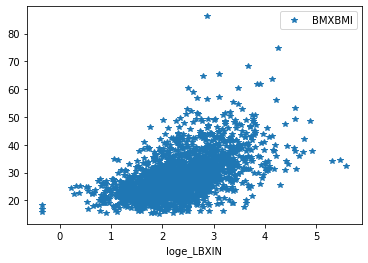

In [21]:
df_merge.plot('loge_LBXIN','BMXBMI',marker='*',linestyle='None')

<AxesSubplot:xlabel='DXDTRPF'>

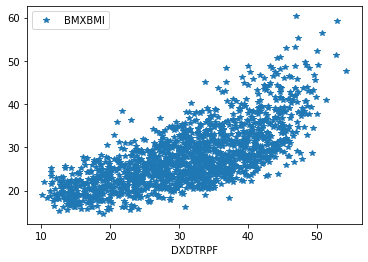

In [22]:
df_merge.plot('DXDTRPF','BMXBMI',marker='*',linestyle='None')

<AxesSubplot:xlabel='DXDTRPF'>

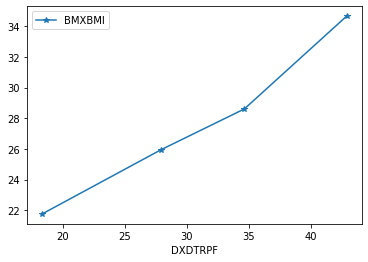

In [23]:
df_merge[['DXDTRPF','BMXBMI']].groupby(pd.cut(df_merge['DXDTRPF'], [df_merge['DXDTRPF'].min(),df_merge['DXDTRPF'].describe()['25%'], df_merge['DXDTRPF'].describe()['50%'],df_merge['DXDTRPF'].describe()['75%'],df_merge['DXDTRPF'].max()])).mean().plot(marker='*',x='DXDTRPF',y='BMXBMI')

<AxesSubplot:xlabel='DXDTOPF'>

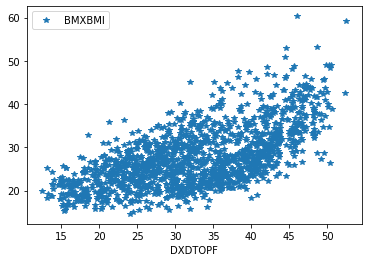

In [25]:
df_merge.plot('DXDTOPF','BMXBMI',marker='*',linestyle='None')

<AxesSubplot:xlabel='DXDTOPF'>

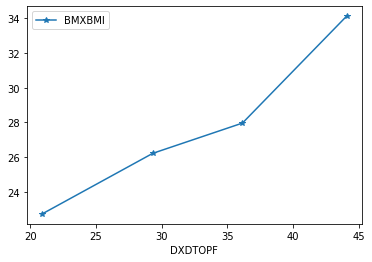

In [24]:
df_merge[['DXDTOPF','BMXBMI']].groupby(pd.cut(df_merge['DXDTOPF'], [df_merge['DXDTOPF'].min(),df_merge['DXDTOPF'].describe()['25%'], df_merge['DXDTOPF'].describe()['50%'],df_merge['DXDTOPF'].describe()['75%'],df_merge['DXDTOPF'].max()])).mean().plot(marker='*',x='DXDTOPF',y='BMXBMI')

<AxesSubplot:xlabel='loge_LBXIN'>

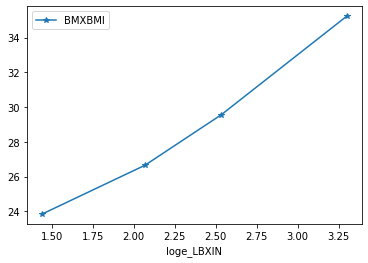

In [24]:
df_merge[['loge_LBXIN','BMXBMI']].groupby(pd.cut(df_merge['loge_LBXIN'], [df_merge['loge_LBXIN'].min(),df_merge['loge_LBXIN'].describe()['25%'], df_merge['loge_LBXIN'].describe()['50%'],df_merge['loge_LBXIN'].describe()['75%'],df_merge['loge_LBXIN'].max()])).mean().plot(marker='*',x='loge_LBXIN',y='BMXBMI')

<AxesSubplot:xlabel='RIDAGEYR'>

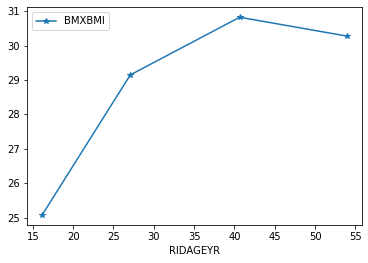

In [25]:
df_merge[['RIDAGEYR','BMXBMI']].groupby(pd.cut(df_merge['RIDAGEYR'], [df_merge['RIDAGEYR'].min(),df_merge['RIDAGEYR'].describe()['25%'], df_merge['RIDAGEYR'].describe()['50%'],df_merge['RIDAGEYR'].describe()['75%'],df_merge['RIDAGEYR'].max()])).mean().plot(marker='*',x='RIDAGEYR',y='BMXBMI')

<AxesSubplot:xlabel='RIDAGEYR'>

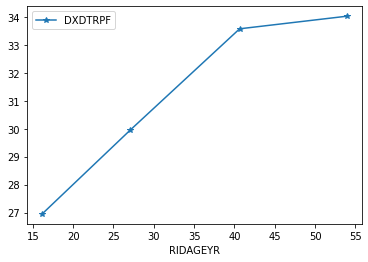

In [26]:
df_merge[['RIDAGEYR','DXDTRPF']].groupby(pd.cut(df_merge['RIDAGEYR'], [df_merge['RIDAGEYR'].min(),df_merge['RIDAGEYR'].describe()['25%'], df_merge['RIDAGEYR'].describe()['50%'],df_merge['RIDAGEYR'].describe()['75%'],df_merge['RIDAGEYR'].max()])).mean().plot(marker='*',x='RIDAGEYR',y='DXDTRPF')

<AxesSubplot:xlabel='RIDAGEYR'>

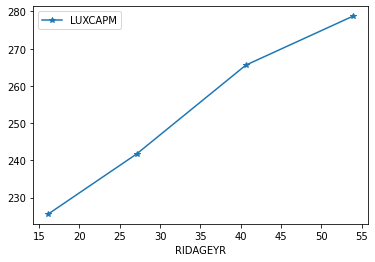

In [27]:
df_merge[['RIDAGEYR','LUXCAPM']].groupby(pd.cut(df_merge['RIDAGEYR'], [df_merge['RIDAGEYR'].min(),df_merge['RIDAGEYR'].describe()['25%'], df_merge['RIDAGEYR'].describe()['50%'],df_merge['RIDAGEYR'].describe()['75%'],df_merge['RIDAGEYR'].max()])).mean().plot(marker='*',x='RIDAGEYR',y='LUXCAPM')

<AxesSubplot:xlabel='RIDAGEYR'>

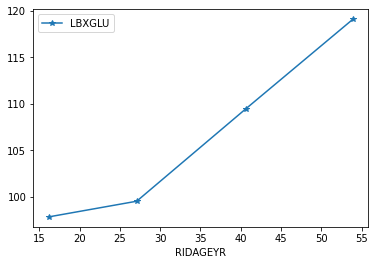

In [20]:
df_merge[['RIDAGEYR','LBXGLU']].groupby(pd.cut(df_merge['RIDAGEYR'], [df_merge['RIDAGEYR'].min(),df_merge['RIDAGEYR'].describe()['25%'], df_merge['RIDAGEYR'].describe()['50%'],df_merge['RIDAGEYR'].describe()['75%'],df_merge['RIDAGEYR'].max()])).mean().plot(marker='*',x='RIDAGEYR',y='LBXGLU')

<AxesSubplot:xlabel='RIDAGEYR'>

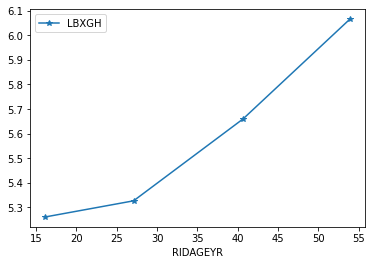

In [19]:
df_merge[['RIDAGEYR','LBXGH']].groupby(pd.cut(df_merge['RIDAGEYR'], [df_merge['RIDAGEYR'].min(),df_merge['RIDAGEYR'].describe()['25%'], df_merge['RIDAGEYR'].describe()['50%'],df_merge['RIDAGEYR'].describe()['75%'],df_merge['RIDAGEYR'].max()])).mean().plot(marker='*',x='RIDAGEYR',y='LBXGH')

<AxesSubplot:xlabel='RIDAGEYR'>

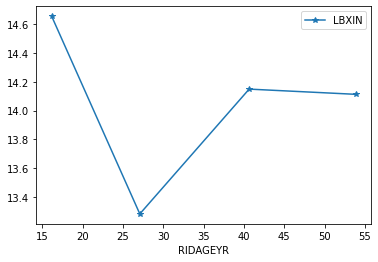

In [18]:
df_merge[['RIDAGEYR','LBXIN']].groupby(pd.cut(df_merge['RIDAGEYR'], [df_merge['RIDAGEYR'].min(),df_merge['RIDAGEYR'].describe()['25%'], df_merge['RIDAGEYR'].describe()['50%'],df_merge['RIDAGEYR'].describe()['75%'],df_merge['RIDAGEYR'].max()])).mean().plot(marker='*',x='RIDAGEYR',y='LBXIN')

<AxesSubplot:xlabel='RIDAGEYR'>

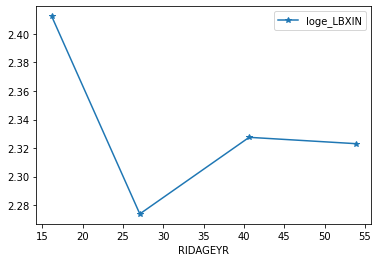

In [28]:
df_merge[['RIDAGEYR','loge_LBXIN']].groupby(pd.cut(df_merge['RIDAGEYR'], [df_merge['RIDAGEYR'].min(),df_merge['RIDAGEYR'].describe()['25%'], df_merge['RIDAGEYR'].describe()['50%'],df_merge['RIDAGEYR'].describe()['75%'],df_merge['RIDAGEYR'].max()])).mean().plot(marker='*',x='RIDAGEYR',y='loge_LBXIN')

<AxesSubplot:xlabel='RIDAGEYR'>

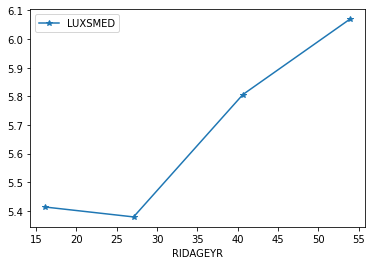

In [29]:
df_merge[['RIDAGEYR','LUXSMED']].groupby(pd.cut(df_merge['RIDAGEYR'], [df_merge['RIDAGEYR'].min(),df_merge['RIDAGEYR'].describe()['25%'], df_merge['RIDAGEYR'].describe()['50%'],df_merge['RIDAGEYR'].describe()['75%'],df_merge['RIDAGEYR'].max()])).mean().plot(marker='*',x='RIDAGEYR',y='LUXSMED')

<AxesSubplot:xlabel='loge_LBXIN'>

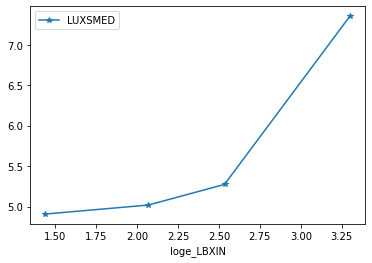

In [30]:
# Liver stiffness high in patients with very high Insulin level
# could high lever stiffness be independant parameter for high insulin level ?
df_merge[['loge_LBXIN','LUXSMED']].groupby(pd.cut(df_merge['loge_LBXIN'], [df_merge['loge_LBXIN'].min(),df_merge['loge_LBXIN'].describe()['25%'], df_merge['loge_LBXIN'].describe()['50%'],df_merge['loge_LBXIN'].describe()['75%'],df_merge['loge_LBXIN'].max()])).mean().plot(marker='*',x='loge_LBXIN',y='LUXSMED')

<AxesSubplot:xlabel='LUXCAPM'>

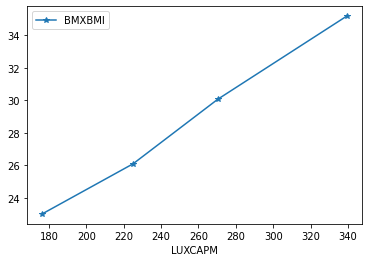

In [31]:
df_merge[['LUXCAPM','BMXBMI']].groupby(pd.cut(df_merge['LUXCAPM'], [df_merge['LUXCAPM'].min(),df_merge['LUXCAPM'].describe()['25%'], df_merge['LUXCAPM'].describe()['50%'],df_merge['LUXCAPM'].describe()['75%'],df_merge['LUXCAPM'].max()])).mean().plot(marker='*',x='LUXCAPM',y='BMXBMI')

<AxesSubplot:xlabel='LUXCAPM'>

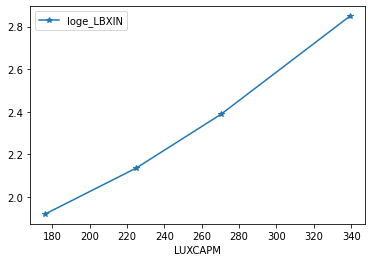

In [32]:
df_merge[['LUXCAPM','loge_LBXIN']].groupby(pd.cut(df_merge['LUXCAPM'], [df_merge['LUXCAPM'].min(),df_merge['LUXCAPM'].describe()['25%'], df_merge['LUXCAPM'].describe()['50%'],df_merge['LUXCAPM'].describe()['75%'],df_merge['LUXCAPM'].max()])).mean().plot(marker='*',x='LUXCAPM',y='loge_LBXIN')

<AxesSubplot:xlabel='DXDTRPF'>

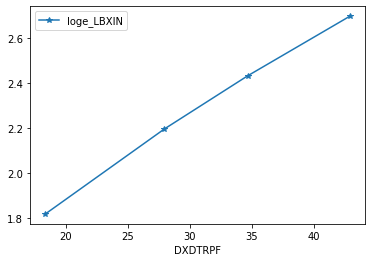

In [55]:
df_merge[['DXDTRPF','loge_LBXIN']].groupby(pd.cut(df_merge['DXDTRPF'], [df_merge['DXDTRPF'].min(),df_merge['DXDTRPF'].describe()['25%'], df_merge['DXDTRPF'].describe()['50%'],df_merge['DXDTRPF'].describe()['75%'],df_merge['DXDTRPF'].max()])).mean().plot(marker='*',x='DXDTRPF',y='loge_LBXIN')

<AxesSubplot:xlabel='DXDTRPF'>

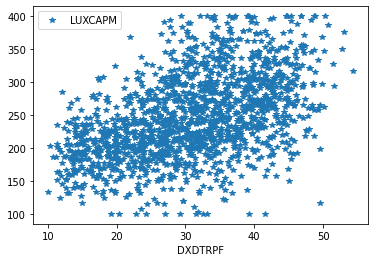

In [37]:
df_merge[['DXDTRPF','LUXCAPM']].plot('DXDTRPF','LUXCAPM',marker='*',linestyle='none')

<AxesSubplot:xlabel='DXDTRPF'>

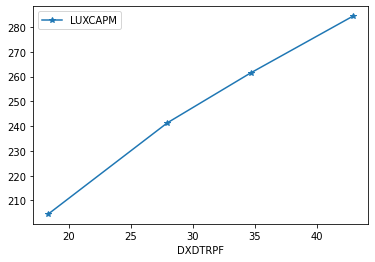

In [33]:
df_merge[['DXDTRPF','LUXCAPM']].groupby(pd.cut(df_merge['DXDTRPF'], [df_merge['DXDTRPF'].min(),df_merge['DXDTRPF'].describe()['25%'], df_merge['DXDTRPF'].describe()['50%'],df_merge['DXDTRPF'].describe()['75%'],df_merge['DXDTRPF'].max()])).mean().plot(marker='*',x='DXDTRPF',y='LUXCAPM')

<AxesSubplot:xlabel='loge_LBXGH'>

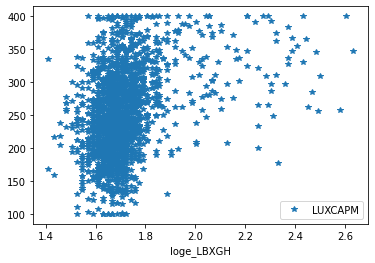

In [53]:
df_merge[['loge_LBXGH','LUXCAPM']].plot('loge_LBXGH','LUXCAPM',marker='*',linestyle='none')

<AxesSubplot:xlabel='LBXGH'>

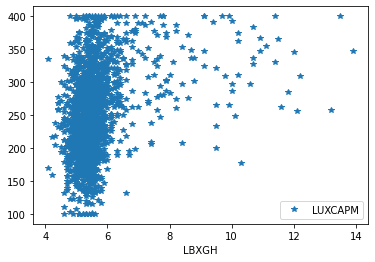

In [54]:
df_merge[['LBXGH','LUXCAPM']].plot('LBXGH','LUXCAPM',marker='*',linestyle='none')

<AxesSubplot:xlabel='LBXGH'>

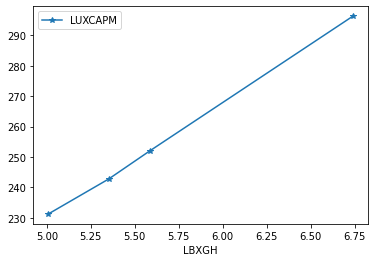

In [38]:

df_merge[['LBXGH','LUXCAPM']].groupby(pd.cut(df_merge['LBXGH'], [df_merge['LBXGH'].min(),df_merge['LBXGH'].describe()['25%'], df_merge['LBXGH'].describe()['50%'],df_merge['LBXGH'].describe()['75%'],df_merge['LBXGH'].max()])).mean().plot(marker='*',x='LBXGH',y='LUXCAPM')

<AxesSubplot:xlabel='LBXGH'>

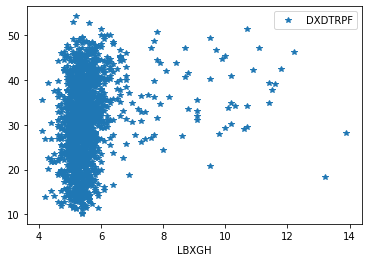

In [49]:
df_merge[['LBXGH','DXDTRPF']].plot('LBXGH','DXDTRPF',marker='*',linestyle='none')

<AxesSubplot:xlabel='loge_LBXGH'>

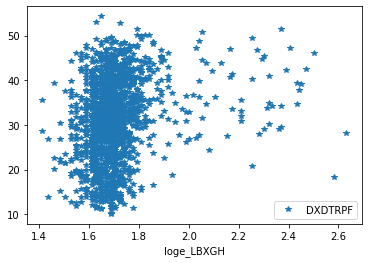

In [48]:
df_merge[['loge_LBXGH','DXDTRPF']].plot('loge_LBXGH','DXDTRPF',marker='*',linestyle='none')

<AxesSubplot:xlabel='LBXGH'>

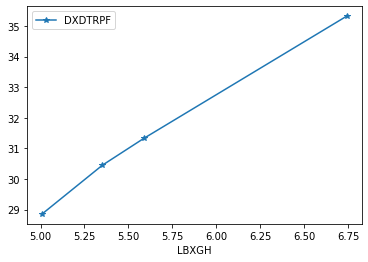

In [46]:
df_merge[['LBXGH','DXDTRPF']].groupby(pd.cut(df_merge['LBXGH'], [df_merge['LBXGH'].min(),df_merge['LBXGH'].describe()['25%'], df_merge['LBXGH'].describe()['50%'],df_merge['LBXGH'].describe()['75%'],df_merge['LBXGH'].max()])).mean().plot(marker='*',x='LBXGH',y='DXDTRPF')

<AxesSubplot:xlabel='LBXGH'>

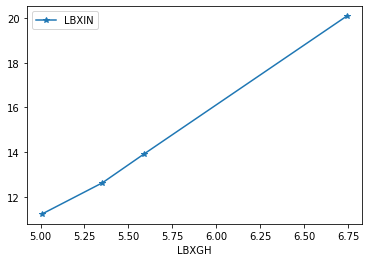

In [22]:
df_merge[['LBXGH','LBXIN']].groupby(pd.cut(df_merge['LBXGH'], [df_merge['LBXGH'].min(),df_merge['LBXGH'].describe()['25%'], df_merge['LBXGH'].describe()['50%'],df_merge['LBXGH'].describe()['75%'],df_merge['LBXGH'].max()])).mean().plot(marker='*',x='LBXGH',y='LBXIN')

<AxesSubplot:xlabel='LBXGLU'>

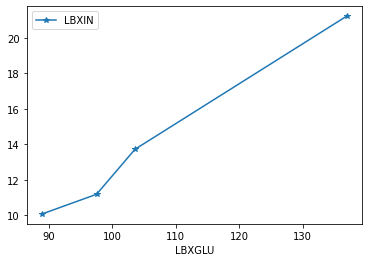

In [23]:
df_merge[['LBXGLU','LBXIN']].groupby(pd.cut(df_merge['LBXGLU'], [df_merge['LBXGLU'].min(),df_merge['LBXGLU'].describe()['25%'], df_merge['LBXGLU'].describe()['50%'],df_merge['LBXGLU'].describe()['75%'],df_merge['LBXGLU'].max()])).mean().plot(marker='*',x='LBXGLU',y='LBXIN')

In [354]:
df_merge[(df_merge['RIDAGEYR']>34)][par].describe()

,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,LUXSMED,LUXCAPM,DXDTRPF,DXDTOPF,LBXIN,loge_LBXIN,LBXGLU,LBXGH
count,993.000000,980.000000,978.000000,949.000000,940.000000,940.000000,726.000000,690.000000,938.000000,938.000000,957.000000,960.000000
mean,47.522659,85.365612,30.470552,101.374183,5.945000,272.414894,33.703306,34.353478,14.193859,2.324654,114.626959,5.872812
std,7.329496,23.676392,7.694021,17.068842,5.229466,62.134916,8.212335,8.434828,17.207295,0.762362,41.457770,1.167906
min,35.000000,39.900000,15.500000,67.500000,2.000000,100.000000,10.100000,13.200000,0.710000,-0.342490,47.000000,4.200000
25%,41.000000,69.600000,25.500000,89.500000,4.000000,227.000000,28.000000,27.925000,6.242500,1.831381,97.000000,5.300000
50%,47.000000,81.950000,28.900000,99.200000,4.900000,271.000000,33.800000,34.200000,9.835000,2.285947,104.000000,5.600000
75%,54.000000,97.100000,34.200000,111.000000,6.100000,314.250000,40.200000,41.375000,16.477500,2.801996,113.000000,5.900000
max,59.000000,242.600000,86.200000,164.100000,75.000000,400.000000,52.800000,53.900000,267.220000,5.588072,451.000000,13.900000


In [29]:
df_merge[(df_merge['RIDAGEYR']>34)][par].corr()

,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,LUXSMED,LUXCAPM,DXDTRPF,DXDTOPF,LBXHSCRP,LBXWBCSI,LBXTC,LBDHDD,LBDLDL,LBXTR,LBXIN,loge_LBXIN,LBXGLU,LBXGH
RIDAGEYR,1.000000,-0.069738,-0.043150,0.031154,0.040805,0.092516,0.049753,0.006286,0.096557,-0.010332,0.075743,0.074180,0.048690,0.019558,-0.006149,-0.004338,0.112307,0.171750
BMXWT,-0.069738,1.000000,0.894059,0.914062,0.347896,0.508733,0.356320,0.275420,0.270535,0.224314,-0.111104,-0.314436,-0.036092,0.117125,0.363515,0.521677,0.188672,0.193541
BMXBMI,-0.043150,0.894059,1.000000,0.914907,0.350252,0.534645,0.627141,0.565176,0.321424,0.265424,-0.082059,-0.269305,-0.013964,0.100955,0.381733,0.568074,0.191339,0.220246
BMXWAIST,0.031154,0.914062,0.914907,1.000000,0.338563,0.597746,0.559349,0.458255,0.290547,0.300434,-0.089595,-0.314024,-0.040408,0.149096,0.396457,0.592503,0.227768,0.248203
LUXSMED,0.040805,0.347896,0.350252,0.338563,1.000000,0.280164,0.115729,0.099041,0.136385,0.103675,-0.034444,-0.079193,-0.032900,0.055566,0.171092,0.215306,0.161691,0.168589
LUXCAPM,0.092516,0.508733,0.534645,0.597746,0.280164,1.000000,0.387459,0.258417,0.148951,0.232637,0.006661,-0.261937,-0.002280,0.210789,0.333355,0.504047,0.310200,0.310129
DXDTRPF,0.049753,0.356320,0.627141,0.559349,0.115729,0.387459,1.000000,0.952736,0.210470,0.221322,0.055196,-0.034155,0.058546,-0.006426,0.241974,0.437966,0.114254,0.136310
DXDTOPF,0.006286,0.275420,0.565176,0.458255,0.099041,0.258417,0.952736,1.000000,0.197224,0.180306,0.048207,0.058747,0.057667,-0.055141,0.190638,0.331017,0.027587,0.063158
LBXHSCRP,0.096557,0.270535,0.321424,0.290547,0.136385,0.148951,0.210470,0.197224,1.000000,0.248870,-0.067678,-0.101774,-0.033683,0.013028,0.135331,0.169315,0.088275,0.126152
LBXWBCSI,-0.010332,0.224314,0.265424,0.300434,0.103675,0.232637,0.221322,0.180306,0.248870,1.000000,-0.022363,-0.228174,-0.004592,0.149664,0.241945,0.298967,0.152164,0.167163


## Check whether there is independant contrbutions by different parameters
#### Aware of Correlation versus Causation; Figure out how to attribute causation
#### Check for correlation changing to decorrelation

In [26]:
# If accounted for insuling then what factors contribute to BMI
df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['LBXIN']<=7)][par].shape

(291, 18)

In [27]:
df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['LBXIN']<=7)][par].describe()

,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,LUXSMED,LUXCAPM,DXDTRPF,DXDTOPF,LBXHSCRP,LBXWBCSI,LBXTC,LBDHDD,LBDLDL,LBXTR,LBXIN,loge_LBXIN,LBXGLU,LBXGH
count,291.000000,289.000000,289.000000,285.000000,276.000000,276.000000,233.000000,222.000000,290.000000,291.000000,291.000000,291.000000,269.000000,273.000000,291.000000,291.000000,291.000000,291.000000
mean,47.402062,71.717993,25.418685,89.617895,4.843116,236.858696,29.174678,30.916216,3.253724,6.252234,195.230241,60.821306,115.765799,90.619048,4.771203,1.499220,104.010309,5.569759
std,7.353151,16.130979,4.716902,12.184335,1.975980,53.428201,7.935022,8.217287,9.186443,2.025208,43.518033,20.378717,36.469485,72.558556,1.481430,0.391234,35.338217,0.944410
min,35.000000,39.900000,15.500000,67.500000,2.200000,100.000000,10.100000,15.300000,0.110000,2.300000,109.000000,11.000000,52.000000,10.000000,0.710000,-0.342490,47.000000,4.200000
25%,41.000000,60.000000,22.100000,80.200000,3.700000,203.000000,23.700000,24.425000,0.607500,4.900000,166.000000,48.000000,90.000000,49.000000,3.630000,1.289233,93.000000,5.200000
50%,47.000000,70.600000,24.600000,88.200000,4.600000,232.500000,28.300000,30.650000,1.210000,5.900000,191.000000,57.000000,113.000000,73.000000,4.970000,1.603420,98.000000,5.400000
75%,54.000000,81.100000,27.900000,98.100000,5.400000,272.250000,34.800000,36.675000,3.100000,7.050000,213.000000,70.500000,134.000000,104.000000,6.040000,1.798404,105.500000,5.600000
max,59.000000,136.400000,46.400000,132.500000,22.900000,382.000000,47.500000,50.600000,109.810000,16.900000,446.000000,178.000000,354.000000,628.000000,7.000000,1.945910,451.000000,13.900000


In [28]:
#luxsmed  not contributing to BMI; Possibly then role of luxsmed in BMI could indirectly due to its effect on Insulin
#LUXCAPM correlation with BMXBMI is higher than LBXIN
df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['LBXIN']<=7)][par].corr()

,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,LUXSMED,LUXCAPM,DXDTRPF,DXDTOPF,LBXHSCRP,LBXWBCSI,LBXTC,LBDHDD,LBDLDL,LBXTR,LBXIN,loge_LBXIN,LBXGLU,LBXGH
RIDAGEYR,1.000000,-0.103110,-0.093133,0.033316,0.025304,0.174453,0.056143,0.023532,0.178131,0.038575,0.164174,0.005613,0.170075,0.124447,-0.050908,-0.073769,0.100375,0.155689
BMXWT,-0.103110,1.000000,0.846236,0.877536,0.158615,0.385181,0.179429,0.133548,-0.048629,0.068577,-0.042979,-0.253988,0.041092,0.107751,0.203790,0.214990,0.117917,0.127792
BMXBMI,-0.093133,0.846236,1.000000,0.872646,0.066386,0.429984,0.506589,0.452889,-0.036480,0.134687,0.004465,-0.227727,0.071111,0.127798,0.357022,0.361567,0.118948,0.121048
BMXWAIST,0.033316,0.877536,0.872646,1.000000,0.131126,0.493821,0.428283,0.328130,-0.003789,0.188490,0.033872,-0.236560,0.078930,0.210216,0.291944,0.299101,0.165465,0.162756
LUXSMED,0.025304,0.158615,0.066386,0.131126,1.000000,0.148763,-0.132364,-0.136400,0.009828,-0.081434,0.016646,0.124936,-0.102539,-0.094577,-0.096547,-0.101625,0.071746,0.115427
LUXCAPM,0.174453,0.385181,0.429984,0.493821,0.148763,1.000000,0.341661,0.209213,-0.021547,0.062496,0.139048,0.005711,0.067304,0.155866,0.223140,0.233265,0.250944,0.220892
DXDTRPF,0.056143,0.179429,0.506589,0.428283,-0.132364,0.341661,1.000000,0.944702,-0.008919,0.074893,0.175644,0.082503,0.086316,0.078399,0.346254,0.356578,0.014164,-0.006957
DXDTOPF,0.023532,0.133548,0.452889,0.328130,-0.136400,0.209213,0.944702,1.000000,0.056302,0.082425,0.098277,0.121824,0.041027,-0.042600,0.281259,0.290804,-0.062989,-0.062634
LBXHSCRP,0.178131,-0.048629,-0.036480,-0.003789,0.009828,-0.021547,-0.008919,0.056302,1.000000,0.288691,-0.075556,-0.103487,-0.029694,-0.014114,0.014981,-0.000612,0.008781,0.042750
LBXWBCSI,0.038575,0.068577,0.134687,0.188490,-0.081434,0.062496,0.074893,0.082425,0.288691,1.000000,-0.090737,-0.265585,0.011482,0.175887,0.079610,0.107277,0.071982,0.083978


In [279]:
df_merge_age_34_insulin_7=df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['LBXIN']<=7)]

In [ ]:
df_merge[['loge_LBXIN','LUXSMED']].groupby(pd.cut(df_merge['loge_LBXIN'], [df_merge['loge_LBXIN'].min(),1.843719, 2.301084, 2.801541,df_merge['loge_LBXIN'].max()])).mean().plot(marker='*',x='loge_LBXIN',y='LUXSMED')

<AxesSubplot:xlabel='loge_LBXIN'>

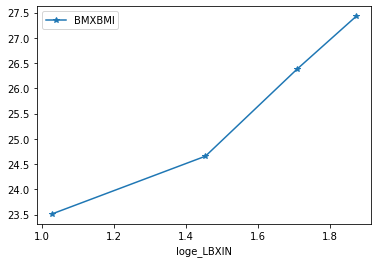

In [343]:
# df_merge[['loge_LBXIN','BMXBMI']].groupby(pd.cut(df_merge['loge_LBXIN'], [df_merge['loge_LBXIN'].min(),df_merge['loge_LBXIN'].describe()['25%'], df_merge['loge_LBXIN'].describe()['50%'],df_merge['loge_LBXIN'].describe()['75%'],df_merge['loge_LBXIN'].max()])).mean().plot(marker='*',x='loge_LBXIN',y='BMXBMI')
df_merge_age_34_insulin_7[['loge_LBXIN','BMXBMI']].groupby(pd.cut(df_merge_age_34_insulin_7['loge_LBXIN'], [df_merge['loge_LBXIN'].min(),df_merge_age_34_insulin_7['loge_LBXIN'].describe()['25%'], df_merge_age_34_insulin_7['loge_LBXIN'].describe()['50%'],df_merge_age_34_insulin_7['loge_LBXIN'].describe()['75%'],df_merge_age_34_insulin_7['loge_LBXIN'].max()])).mean().plot(marker='*',x='loge_LBXIN',y='BMXBMI')

In [344]:
df_merge_age_34_insulin_7[['LBXIN','BMXBMI']].groupby(pd.cut(df_merge_age_34_insulin_7['LBXIN'], [df_merge['LBXIN'].min(),df_merge_age_34_insulin_7['LBXIN'].describe()['25%'], df_merge_age_34_insulin_7['LBXIN'].describe()['50%'],df_merge_age_34_insulin_7['LBXIN'].describe()['75%'],df_merge_age_34_insulin_7['LBXIN'].max()])).mean()

,LBXIN,BMXBMI
LBXIN,,
"(0.71, 3.63]",2.867465,23.509859
"(3.63, 4.97]",4.304306,24.655714
"(4.97, 6.04]",5.529041,26.375342
"(6.04, 7.0]",6.516250,27.427778


<AxesSubplot:xlabel='loge_LBXIN'>

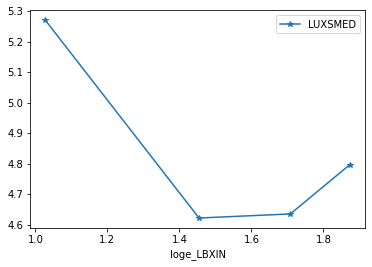

In [281]:
df_merge_age_34_insulin_7[['loge_LBXIN','LUXSMED']].groupby(pd.cut(df_merge_age_34_insulin_7['loge_LBXIN'], [df_merge['loge_LBXIN'].min(),df_merge_age_34_insulin_7['loge_LBXIN'].describe()['25%'], df_merge_age_34_insulin_7['loge_LBXIN'].describe()['50%'],df_merge_age_34_insulin_7['loge_LBXIN'].describe()['75%'],df_merge_age_34_insulin_7['loge_LBXIN'].max()])).mean().plot(marker='*',x='loge_LBXIN',y='LUXSMED')

<AxesSubplot:xlabel='LUXCAPM'>

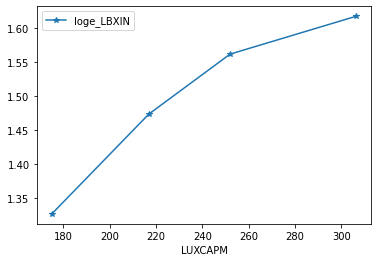

In [283]:
df_merge_age_34_insulin_7[['LUXCAPM','loge_LBXIN']].groupby(pd.cut(df_merge_age_34_insulin_7['LUXCAPM'], [df_merge_age_34_insulin_7['LUXCAPM'].min(),df_merge_age_34_insulin_7['LUXCAPM'].describe()['25%'], df_merge_age_34_insulin_7['LUXCAPM'].describe()['50%'],df_merge_age_34_insulin_7['LUXCAPM'].describe()['75%'],df_merge_age_34_insulin_7['LUXCAPM'].max()])).mean().plot(marker='*',x='LUXCAPM',y='loge_LBXIN')

<AxesSubplot:xlabel='LUXCAPM'>

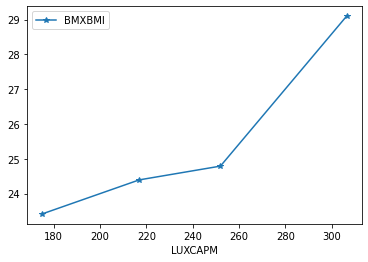

In [285]:
df_merge_age_34_insulin_7[['LUXCAPM','BMXBMI']].groupby(pd.cut(df_merge_age_34_insulin_7['LUXCAPM'], [df_merge_age_34_insulin_7['LUXCAPM'].min(),df_merge_age_34_insulin_7['LUXCAPM'].describe()['25%'], df_merge_age_34_insulin_7['LUXCAPM'].describe()['50%'],df_merge_age_34_insulin_7['LUXCAPM'].describe()['75%'],df_merge_age_34_insulin_7['LUXCAPM'].max()])).mean().plot(marker='*',x='LUXCAPM',y='BMXBMI')

In [347]:
df_merge_age_34_insulin_7[['LUXCAPM','BMXBMI']].groupby(pd.cut(df_merge_age_34_insulin_7['LUXCAPM'], [df_merge_age_34_insulin_7['LUXCAPM'].min(),df_merge_age_34_insulin_7['LUXCAPM'].describe()['25%'], df_merge_age_34_insulin_7['LUXCAPM'].describe()['50%'],df_merge_age_34_insulin_7['LUXCAPM'].describe()['75%'],df_merge_age_34_insulin_7['LUXCAPM'].max()])).mean()

,LUXCAPM,BMXBMI
LUXCAPM,,
"(100.0, 203.0]",175.056338,23.414085
"(203.0, 232.5]",216.939394,24.392424
"(232.5, 272.25]",251.971014,24.788235
"(272.25, 382.0]",306.376812,29.095652


In [308]:
df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['LBXIN']<=7)&(df_merge['LUXCAPM']<236)][par].describe()

,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,LUXSMED,LUXCAPM,DXDTRPF,DXDTOPF,LBXIN,loge_LBXIN,LBXGLU,LBXGH
count,143.000000,143.000000,143.000000,141.000000,143.000000,143.000000,121.000000,117.000000,143.000000,143.000000,143.000000,143.000000
mean,46.622378,67.303497,23.845455,84.907801,4.727273,195.923077,26.765289,29.388889,4.400979,1.401050,97.804196,5.434965
std,7.570145,13.786472,3.772859,10.082609,1.756645,29.486229,7.707655,7.991642,1.558096,0.442354,17.529958,0.474157
min,35.000000,42.200000,15.700000,67.500000,2.400000,100.000000,10.100000,15.300000,0.710000,-0.342490,47.000000,4.200000
25%,40.000000,57.050000,21.250000,76.200000,3.600000,184.000000,21.400000,23.200000,3.325000,1.201469,92.000000,5.200000
50%,46.000000,66.100000,23.200000,83.500000,4.600000,203.000000,26.300000,29.800000,4.330000,1.465568,97.000000,5.400000
75%,54.000000,76.500000,26.400000,91.700000,5.300000,216.000000,31.800000,34.500000,5.785000,1.755268,102.000000,5.600000
max,59.000000,118.600000,35.100000,114.300000,17.200000,235.000000,47.500000,48.600000,6.960000,1.940179,275.000000,9.500000


In [309]:
df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['LBXIN']<=7)&(df_merge['LUXCAPM']<236)][par].corr()

,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,LUXSMED,LUXCAPM,DXDTRPF,DXDTOPF,LBXIN,loge_LBXIN,LBXGLU,LBXGH
RIDAGEYR,1.000000,-0.186122,-0.209816,-0.021638,0.063958,0.242577,0.051616,-0.028635,-0.162009,-0.191404,-0.027678,0.123186
BMXWT,-0.186122,1.000000,0.837779,0.862013,0.091931,0.071802,0.089523,0.018037,0.144962,0.173858,0.051361,0.050162
BMXBMI,-0.209816,0.837779,1.000000,0.840345,-0.013056,0.058701,0.457686,0.379083,0.342816,0.365503,-0.013824,-0.047110
BMXWAIST,-0.021638,0.862013,0.840345,1.000000,0.021916,0.079414,0.413614,0.284864,0.272505,0.283304,0.033067,0.007908
LUXSMED,0.063958,0.091931,-0.013056,0.021916,1.000000,0.039714,-0.229933,-0.198180,-0.122305,-0.134221,-0.023723,0.021168
LUXCAPM,0.242577,0.071802,0.058701,0.079414,0.039714,1.000000,0.101001,0.061370,0.117459,0.120973,0.054209,0.099523
DXDTRPF,0.051616,0.089523,0.457686,0.413614,-0.229933,0.101001,1.000000,0.945042,0.420042,0.417323,-0.056699,-0.081469
DXDTOPF,-0.028635,0.018037,0.379083,0.284864,-0.198180,0.061370,0.945042,1.000000,0.333550,0.345533,-0.095267,-0.101271
LBXIN,-0.162009,0.144962,0.342816,0.272505,-0.122305,0.117459,0.420042,0.333550,1.000000,0.954343,0.144377,0.019552
loge_LBXIN,-0.191404,0.173858,0.365503,0.283304,-0.134221,0.120973,0.417323,0.345533,0.954343,1.000000,0.180910,0.050766


In [304]:
df_merge_age_34_insulin_7_CAPM_236=df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['LBXIN']<=7)&(df_merge['LUXCAPM']<236)][par]

<AxesSubplot:xlabel='loge_LBXIN'>

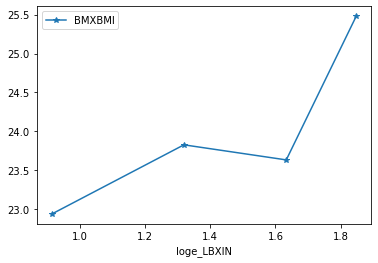

In [305]:
df_merge_age_34_insulin_7_CAPM_236[['loge_LBXIN','BMXBMI']].groupby(pd.cut(df_merge_age_34_insulin_7_CAPM_236['loge_LBXIN'], [df_merge_age_34_insulin_7_CAPM_236['loge_LBXIN'].min(),df_merge_age_34_insulin_7_CAPM_236['loge_LBXIN'].describe()['25%'], df_merge_age_34_insulin_7_CAPM_236['loge_LBXIN'].describe()['50%'],df_merge_age_34_insulin_7_CAPM_236['loge_LBXIN'].describe()['75%'],df_merge_age_34_insulin_7_CAPM_236['loge_LBXIN'].max()])).mean().plot(marker='*',x='loge_LBXIN',y='BMXBMI')

<AxesSubplot:xlabel='LBXIN'>

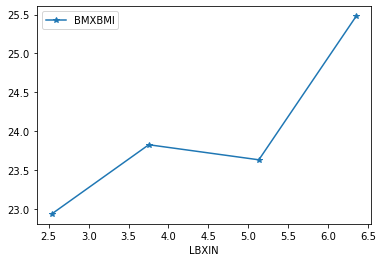

In [340]:
df_merge_age_34_insulin_7_CAPM_236[['LBXIN','BMXBMI']].groupby(pd.cut(df_merge_age_34_insulin_7_CAPM_236['LBXIN'], [df_merge_age_34_insulin_7_CAPM_236['LBXIN'].min(),df_merge_age_34_insulin_7_CAPM_236['LBXIN'].describe()['25%'], df_merge_age_34_insulin_7_CAPM_236['LBXIN'].describe()['50%'],df_merge_age_34_insulin_7_CAPM_236['LBXIN'].describe()['75%'],df_merge_age_34_insulin_7_CAPM_236['LBXIN'].max()])).mean().plot(marker='*',x='LBXIN',y='BMXBMI')

<AxesSubplot:xlabel='LUXCAPM'>

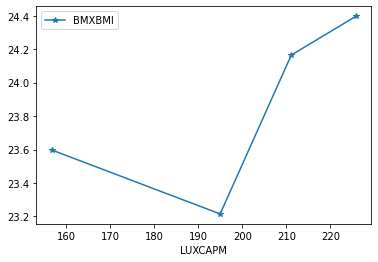

In [306]:
df_merge_age_34_insulin_7_CAPM_236[['LUXCAPM','BMXBMI']].groupby(pd.cut(df_merge_age_34_insulin_7_CAPM_236['LUXCAPM'], [df_merge_age_34_insulin_7_CAPM_236['LUXCAPM'].min(),df_merge_age_34_insulin_7_CAPM_236['LUXCAPM'].describe()['25%'], df_merge_age_34_insulin_7_CAPM_236['LUXCAPM'].describe()['50%'],df_merge_age_34_insulin_7_CAPM_236['LUXCAPM'].describe()['75%'],df_merge_age_34_insulin_7_CAPM_236['LUXCAPM'].max()])).mean().plot(marker='*',x='LUXCAPM',y='BMXBMI')

<AxesSubplot:xlabel='DXDTRPF'>

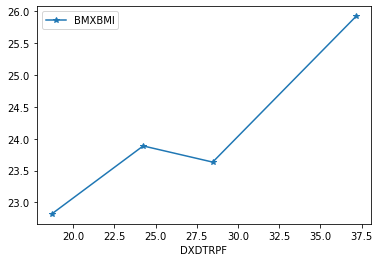

In [307]:
df_merge_age_34_insulin_7_CAPM_236[['DXDTRPF','BMXBMI']].groupby(pd.cut(df_merge_age_34_insulin_7_CAPM_236['DXDTRPF'], [df_merge_age_34_insulin_7_CAPM_236['DXDTOPF'].min(),df_merge_age_34_insulin_7_CAPM_236['DXDTRPF'].describe()['25%'], df_merge_age_34_insulin_7_CAPM_236['DXDTRPF'].describe()['50%'],df_merge_age_34_insulin_7_CAPM_236['DXDTRPF'].describe()['75%'],df_merge_age_34_insulin_7_CAPM_236['DXDTRPF'].max()])).mean().plot(marker='*',x='DXDTRPF',y='BMXBMI')

In [319]:
df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['LBXIN']<=7)&(df_merge['LUXCAPM']<236)&(df_merge['DXDTRPF']<=25)][par].describe()

,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,LUXSMED,LUXCAPM,DXDTRPF,DXDTOPF,LBXIN,loge_LBXIN,LBXGLU,LBXGH
count,51.000000,51.00000,51.000000,51.000000,51.000000,51.000000,51.000000,44.000000,51.000000,51.000000,51.000000,51.000000
mean,46.980392,67.17451,22.431373,81.660784,5.064706,196.039216,19.827451,22.179545,3.772157,1.239003,100.705882,5.519608
std,7.703221,13.51951,3.113679,8.003001,2.428153,25.199969,3.699518,4.482606,1.387934,0.471074,26.194117,0.655750
min,35.000000,42.20000,16.800000,68.700000,3.100000,126.000000,10.100000,15.300000,0.710000,-0.342490,80.000000,4.900000
25%,39.500000,57.10000,20.100000,74.850000,3.900000,184.000000,17.000000,19.125000,2.760000,1.014120,93.000000,5.200000
50%,47.000000,66.10000,22.200000,82.000000,4.600000,200.000000,20.300000,22.150000,3.830000,1.342865,98.000000,5.500000
75%,54.500000,74.75000,23.900000,88.300000,5.500000,212.000000,23.050000,24.575000,4.945000,1.598364,102.500000,5.600000
max,59.000000,96.60000,32.800000,98.100000,17.200000,235.000000,24.900000,31.900000,6.420000,1.859418,275.000000,9.500000


In [321]:
df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['LBXIN']<=7)&(df_merge['LUXCAPM']<236)&(df_merge['DXDTRPF']<=25)][par].corr()

,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,LUXSMED,LUXCAPM,DXDTRPF,DXDTOPF,LBXIN,loge_LBXIN,LBXGLU,LBXGH
RIDAGEYR,1.000000,-0.382553,-0.364780,-0.201152,0.080584,0.212449,0.169504,0.023602,-0.045097,-0.136212,-0.095183,0.029377
BMXWT,-0.382553,1.000000,0.860579,0.900523,0.144382,0.203941,0.024735,-0.325018,0.055314,0.120201,0.074730,0.095214
BMXBMI,-0.364780,0.860579,1.000000,0.779992,0.082842,0.186947,0.194626,-0.128341,0.185490,0.262186,0.012058,0.014875
BMXWAIST,-0.201152,0.900523,0.779992,1.000000,0.195990,0.288709,0.279779,-0.174119,0.051207,0.123071,0.093088,0.100989
LUXSMED,0.080584,0.144382,0.082842,0.195990,1.000000,0.166490,-0.218325,-0.375984,0.023251,-0.031961,-0.034158,-0.018021
LUXCAPM,0.212449,0.203941,0.186947,0.288709,0.166490,1.000000,0.181200,-0.146697,0.334571,0.343790,0.074523,0.054174
DXDTRPF,0.169504,0.024735,0.194626,0.279779,-0.218325,0.181200,1.000000,0.809837,0.231029,0.291263,0.086953,0.052784
DXDTOPF,0.023602,-0.325018,-0.128341,-0.174119,-0.375984,-0.146697,0.809837,1.000000,0.218281,0.300994,0.030336,0.001482
LBXIN,-0.045097,0.055314,0.185490,0.051207,0.023251,0.334571,0.231029,0.218281,1.000000,0.949182,0.092421,0.098487
loge_LBXIN,-0.136212,0.120201,0.262186,0.123071,-0.031961,0.343790,0.291263,0.300994,0.949182,1.000000,0.137678,0.124304


In [323]:
df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['LBXIN']<=7)&(df_merge['LUXCAPM']<236)&(df_merge['DXDTRPF']<=25)][par].sort_values(by='BMXBMI')

,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,LUXSMED,LUXCAPM,DXDTRPF,DXDTOPF,LBXIN,loge_LBXIN,LBXGLU,LBXGH
311,58.0,52.5,16.8,72.0,5.9,142.0,14.8,15.3,0.71,-0.342490,83.0,5.1
853,36.0,57.9,18.1,76.0,5.7,200.0,18.8,20.8,4.83,1.574846,90.0,5.1
736,51.0,53.4,18.2,71.3,7.0,163.0,14.0,15.4,0.71,-0.342490,83.0,5.5
1082,50.0,54.7,18.4,77.9,6.4,210.0,17.6,17.8,2.05,0.717840,93.0,5.1
417,53.0,58.3,18.6,76.1,4.0,221.0,18.0,19.7,5.58,1.719189,91.0,5.0
1420,39.0,64.4,18.9,74.2,5.4,134.0,10.1,NaN,2.34,0.850151,95.0,5.4
1805,56.0,48.9,19.0,72.1,5.4,184.0,23.9,30.6,3.42,1.229641,102.0,5.8
329,47.0,52.9,19.2,76.0,3.6,168.0,23.6,25.5,4.97,1.603420,110.0,6.0
1691,54.0,53.4,19.5,72.5,3.9,190.0,23.9,31.9,5.84,1.764731,97.0,5.6
1509,43.0,42.2,19.5,68.7,5.0,193.0,21.7,31.5,4.24,1.444563,106.0,5.4


In [325]:
df_merge_age_34_insulin_7_CAPM_236_TRPF_25=df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['LBXIN']<=7)&(df_merge['LUXCAPM']<236)&(df_merge['DXDTRPF']<=25)][par]

<AxesSubplot:xlabel='loge_LBXIN'>

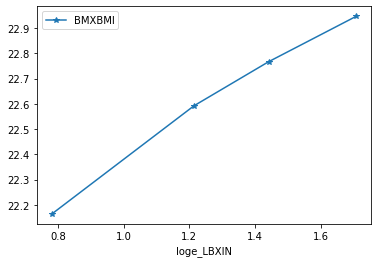

In [326]:
df_merge_age_34_insulin_7_CAPM_236_TRPF_25[['loge_LBXIN','BMXBMI']].groupby(pd.cut(df_merge_age_34_insulin_7_CAPM_236_TRPF_25['loge_LBXIN'], [df_merge_age_34_insulin_7_CAPM_236_TRPF_25['loge_LBXIN'].min(),df_merge_age_34_insulin_7_CAPM_236_TRPF_25['loge_LBXIN'].describe()['25%'], df_merge_age_34_insulin_7_CAPM_236_TRPF_25['loge_LBXIN'].describe()['50%'],df_merge_age_34_insulin_7_CAPM_236_TRPF_25['loge_LBXIN'].describe()['75%'],df_merge_age_34_insulin_7_CAPM_236_TRPF_25['loge_LBXIN'].max()])).mean().plot(marker='*',x='loge_LBXIN',y='BMXBMI')

In [329]:
df_merge_age_34_insulin_7_CAPM_236_TRPF_25[['loge_LBXIN','BMXBMI']].groupby(pd.cut(df_merge_age_34_insulin_7_CAPM_236_TRPF_25['loge_LBXIN'], [df_merge_age_34_insulin_7_CAPM_236_TRPF_25['loge_LBXIN'].min(),df_merge_age_34_insulin_7_CAPM_236_TRPF_25['loge_LBXIN'].describe()['25%'], df_merge_age_34_insulin_7_CAPM_236_TRPF_25['loge_LBXIN'].describe()['50%'],df_merge_age_34_insulin_7_CAPM_236_TRPF_25['loge_LBXIN'].describe()['75%'],df_merge_age_34_insulin_7_CAPM_236_TRPF_25['loge_LBXIN'].max()])).mean()

,loge_LBXIN,BMXBMI
loge_LBXIN,,
"(-0.342, 1.014]",0.781525,22.163636
"(1.014, 1.343]",1.214366,22.592308
"(1.343, 1.598]",1.441275,22.766667
"(1.598, 1.859]",1.707332,22.946154


<AxesSubplot:xlabel='LBXIN'>

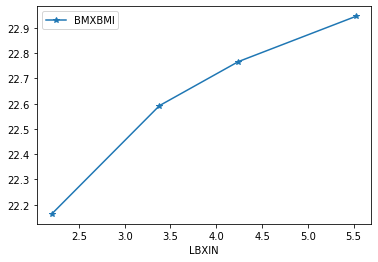

In [341]:
df_merge_age_34_insulin_7_CAPM_236_TRPF_25[['LBXIN','BMXBMI']].groupby(pd.cut(df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LBXIN'], [df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LBXIN'].min(),df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LBXIN'].describe()['25%'], df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LBXIN'].describe()['50%'],df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LBXIN'].describe()['75%'],df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LBXIN'].max()])).mean().plot(marker='*',x='LBXIN',y='BMXBMI')

In [342]:
df_merge_age_34_insulin_7_CAPM_236_TRPF_25[['LBXIN','BMXBMI']].groupby(pd.cut(df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LBXIN'], [df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LBXIN'].min(),df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LBXIN'].describe()['25%'], df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LBXIN'].describe()['50%'],df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LBXIN'].describe()['75%'],df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LBXIN'].max()])).mean()

,LBXIN,BMXBMI
LBXIN,,
"(0.71, 2.76]",2.203636,22.163636
"(2.76, 3.83]",3.380000,22.592308
"(3.83, 4.945]",4.242500,22.766667
"(4.945, 6.42]",5.528462,22.946154


<AxesSubplot:xlabel='DXDTRPF'>

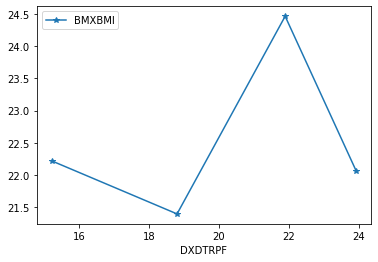

In [330]:
df_merge_age_34_insulin_7_CAPM_236_TRPF_25[['DXDTRPF','BMXBMI']].groupby(pd.cut(df_merge_age_34_insulin_7_CAPM_236_TRPF_25['DXDTRPF'], [df_merge_age_34_insulin_7_CAPM_236_TRPF_25['DXDTRPF'].min(),df_merge_age_34_insulin_7_CAPM_236_TRPF_25['DXDTRPF'].describe()['25%'], df_merge_age_34_insulin_7_CAPM_236_TRPF_25['DXDTRPF'].describe()['50%'],df_merge_age_34_insulin_7_CAPM_236_TRPF_25['DXDTRPF'].describe()['75%'],df_merge_age_34_insulin_7_CAPM_236_TRPF_25['DXDTRPF'].max()])).mean().plot(marker='*',x='DXDTRPF',y='BMXBMI')

<AxesSubplot:xlabel='LUXCAPM'>

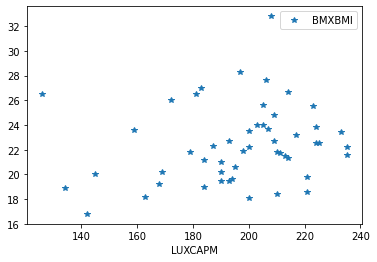

In [339]:
df_merge_age_34_insulin_7_CAPM_236_TRPF_25[['LUXCAPM','BMXBMI']].plot('LUXCAPM','BMXBMI',marker='*',linestyle='None')

<AxesSubplot:xlabel='LUXCAPM'>

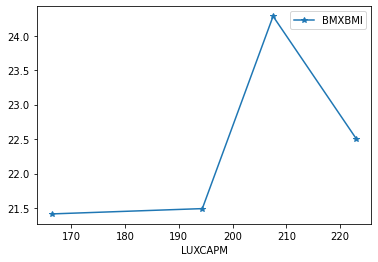

In [331]:
df_merge_age_34_insulin_7_CAPM_236_TRPF_25[['LUXCAPM','BMXBMI']].groupby(pd.cut(df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LUXCAPM'], [df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LUXCAPM'].min(),df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LUXCAPM'].describe()['25%'], df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LUXCAPM'].describe()['50%'],df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LUXCAPM'].describe()['75%'],df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LUXCAPM'].max()])).mean().plot(marker='*',x='LUXCAPM',y='BMXBMI')

In [335]:
df_merge_age_34_insulin_7_CAPM_236_TRPF_25[['LUXCAPM','BMXBMI']].groupby(pd.cut(df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LUXCAPM'], [df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LUXCAPM'].min(),df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LUXCAPM'].describe()['25%'], df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LUXCAPM'].describe()['50%'],df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LUXCAPM'].describe()['75%'],df_merge_age_34_insulin_7_CAPM_236_TRPF_25['LUXCAPM'].max()])).mean()

,LUXCAPM,BMXBMI
LUXCAPM,,
"(126.0, 184.0]",166.384615,21.415385
"(184.0, 200.0]",194.384615,21.492308
"(200.0, 212.0]",207.545455,24.281818
"(212.0, 235.0]",223.000000,22.507692


<AxesSubplot:xlabel='LBXIN'>

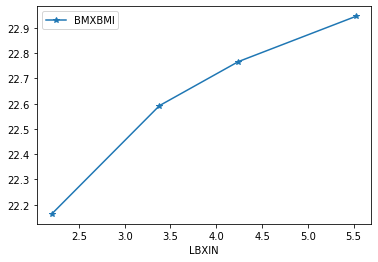

,LBXIN,BMXBMI
LBXIN,,
"(0.71, 2.76]",2.203636,22.163636
"(2.76, 3.83]",3.380000,22.592308
"(3.83, 4.945]",4.242500,22.766667
"(4.945, 6.42]",5.528462,22.946154


In [149]:
df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['BMXBMI']<30)][par].shape

(555, 11)

In [148]:
df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['BMXBMI']<30)][par].describe()

,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,LUXSMED,LUXCAPM,DXDTRPF,DXDTOPF,LBXIN,LBXGLU,LBXGH
count,555.000000,555.000000,555.00000,542.000000,535.000000,535.000000,449.000000,417.000000,524.000000,538.000000,539.000000
mean,47.619820,71.438919,25.42018,90.447970,4.890841,246.600000,30.540757,31.105276,8.721412,108.258364,5.653432
std,7.308664,12.422150,3.02774,9.407598,2.085003,51.870849,7.478911,7.496189,5.979981,34.790008,0.934193
min,35.000000,39.900000,15.50000,67.500000,2.000000,100.000000,10.100000,13.200000,0.710000,47.000000,4.200000
25%,41.000000,62.150000,23.30000,84.100000,3.700000,211.000000,25.700000,25.100000,4.960000,95.000000,5.200000
50%,47.000000,71.000000,26.00000,91.400000,4.600000,245.000000,30.700000,30.600000,7.290000,101.000000,5.500000
75%,54.000000,79.800000,27.80000,97.275000,5.450000,282.000000,35.500000,37.200000,10.970000,109.000000,5.700000
max,59.000000,110.500000,29.90000,120.400000,27.700000,392.000000,49.300000,50.300000,52.340000,451.000000,13.200000


In [147]:
#LBXIN most strongly associated with BMXBMI,LUXCAPM,DXDTRPF than LBXGH
#LBXGH most strongly associated with LUXCAPM than rest
#LUXCAPM most strongly associated with BMXWAIST,DXDTRPF,LBXIN
df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['BMXBMI']<30)][par].corr()

,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,LUXSMED,LUXCAPM,DXDTRPF,DXDTOPF,LBXIN,LBXGLU,LBXGH
RIDAGEYR,1.000000,-0.073397,-0.085987,0.072128,0.049298,0.127640,0.075860,0.039973,0.025484,0.145870,0.213420
BMXWT,-0.073397,1.000000,0.712169,0.809245,0.155020,0.276182,-0.021782,-0.179432,0.258804,0.089615,0.036379
BMXBMI,-0.085987,0.712169,1.000000,0.805051,0.077958,0.400273,0.449774,0.280074,0.370765,0.099016,0.089498
BMXWAIST,0.072128,0.809245,0.805051,1.000000,0.144704,0.428836,0.350248,0.153514,0.363067,0.166134,0.143019
LUXSMED,0.049298,0.155020,0.077958,0.144704,1.000000,0.200837,-0.124433,-0.120226,0.078343,0.074300,0.115862
LUXCAPM,0.127640,0.276182,0.400273,0.428836,0.200837,1.000000,0.318244,0.169130,0.359622,0.239916,0.242317
DXDTRPF,0.075860,-0.021782,0.449774,0.350248,-0.124433,0.318244,1.000000,0.936284,0.325990,0.068294,0.071648
DXDTOPF,0.039973,-0.179432,0.280074,0.153514,-0.120226,0.169130,0.936284,1.000000,0.212175,-0.033822,-0.002303
LBXIN,0.025484,0.258804,0.370765,0.363067,0.078343,0.359622,0.325990,0.212175,1.000000,0.198807,0.121650
LBXGLU,0.145870,0.089615,0.099016,0.166134,0.074300,0.239916,0.068294,-0.033822,0.198807,1.000000,0.856975


In [146]:
df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['BMXBMI']<30)&(df_merge['LBXIN']<=7)][par].shape

(246, 11)

In [150]:
df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['BMXBMI']<30)&(df_merge['LBXIN']<=7)][par].describe()

,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,LUXSMED,LUXCAPM,DXDTRPF,DXDTOPF,LBXIN,LBXGLU,LBXGH
count,246.000000,246.000000,246.000000,243.000000,234.000000,234.000000,201.000000,190.000000,246.000000,246.000000,246.000000
mean,47.361789,67.745935,23.960569,86.388889,4.763675,228.756410,28.037811,29.646316,4.634919,101.617886,5.513821
std,7.341468,12.704068,3.108689,9.551059,1.971755,48.747097,7.343478,7.414990,1.494983,28.291347,0.723746
min,35.000000,39.900000,15.500000,67.500000,2.200000,100.000000,10.100000,15.300000,0.710000,47.000000,4.200000
25%,41.000000,58.500000,21.800000,78.550000,3.625000,198.250000,23.100000,23.900000,3.552500,93.000000,5.200000
50%,47.000000,67.250000,23.850000,86.400000,4.550000,224.000000,27.600000,29.800000,4.850000,98.000000,5.400000
75%,54.000000,76.700000,26.500000,93.550000,5.400000,259.000000,33.400000,35.375000,5.930000,104.750000,5.600000
max,59.000000,105.500000,29.800000,115.200000,22.900000,382.000000,47.500000,48.600000,7.000000,451.000000,13.200000


In [151]:
df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['BMXBMI']<30)&(df_merge['LBXIN']<=7)][par].corr()

,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,LUXSMED,LUXCAPM,DXDTRPF,DXDTOPF,LBXIN,LBXGLU,LBXGH
RIDAGEYR,1.000000,-0.133066,-0.152713,0.032099,0.061317,0.176565,0.075657,0.024848,-0.042476,0.085760,0.193866
BMXWT,-0.133066,1.000000,0.786089,0.825994,0.105772,0.258116,-0.005057,-0.166173,0.132464,0.071977,0.103551
BMXBMI,-0.152713,0.786089,1.000000,0.812364,-0.023714,0.279987,0.395963,0.207152,0.329187,0.046502,0.068437
BMXWAIST,0.032099,0.825994,0.812364,1.000000,0.049804,0.364856,0.294224,0.092417,0.263803,0.087200,0.104178
LUXSMED,0.061317,0.105772,-0.023714,0.049804,1.000000,0.053383,-0.204009,-0.170747,-0.100197,0.036139,0.085852
LUXCAPM,0.176565,0.258116,0.279987,0.364856,0.053383,1.000000,0.268426,0.119990,0.220039,0.140147,0.119527
DXDTRPF,0.075657,-0.005057,0.395963,0.294224,-0.204009,0.268426,1.000000,0.933478,0.349238,-0.084019,-0.091129
DXDTOPF,0.024848,-0.166173,0.207152,0.092417,-0.170747,0.119990,0.933478,1.000000,0.243383,-0.155684,-0.152520
LBXIN,-0.042476,0.132464,0.329187,0.263803,-0.100197,0.220039,0.349238,0.243383,1.000000,0.079347,0.057375
LBXGLU,0.085760,0.071977,0.046502,0.087200,0.036139,0.140147,-0.084019,-0.155684,0.079347,1.000000,0.856802


In [160]:
df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['BMXBMI']<25)][par].describe()

,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,LUXSMED,LUXCAPM,DXDTRPF,DXDTOPF,LBXIN,LBXGLU,LBXGH
count,222.000000,222.000000,222.000000,218.000000,214.000000,214.000000,185.000000,175.000000,211.000000,215.000000,214.000000
mean,48.166667,62.253153,22.306757,82.669266,4.771495,226.602804,27.390811,29.112000,6.348104,104.516279,5.548598
std,7.535987,8.926369,1.947826,7.130354,2.049409,46.173343,7.270651,7.315864,4.463658,34.329879,0.828412
min,35.000000,39.900000,15.500000,67.500000,2.200000,100.000000,10.100000,13.200000,0.710000,47.000000,4.400000
25%,42.000000,56.050000,21.200000,77.250000,3.600000,197.250000,22.700000,23.250000,3.610000,93.500000,5.200000
50%,48.000000,61.600000,22.600000,82.500000,4.500000,224.000000,27.700000,29.800000,5.240000,99.000000,5.400000
75%,55.000000,69.975000,23.900000,87.750000,5.300000,254.750000,32.900000,35.100000,7.280000,106.000000,5.700000
max,59.000000,81.900000,24.900000,98.100000,22.900000,379.000000,44.300000,44.600000,30.480000,451.000000,13.200000


In [161]:
df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['BMXBMI']<25)][par].corr()

,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,LUXSMED,LUXCAPM,DXDTRPF,DXDTOPF,LBXIN,LBXGLU,LBXGH
RIDAGEYR,1.000000,-0.073169,-0.101710,0.107259,0.089104,0.215880,0.068864,0.017854,0.110729,0.107622,0.236109
BMXWT,-0.073169,1.000000,0.639136,0.733435,0.127030,0.247623,-0.121637,-0.287169,0.170278,0.188369,0.126714
BMXBMI,-0.101710,0.639136,1.000000,0.714800,0.006085,0.282289,0.390238,0.229561,0.250131,0.147212,0.102348
BMXWAIST,0.107259,0.733435,0.714800,1.000000,0.066000,0.465259,0.349105,0.129839,0.295869,0.220982,0.163385
LUXSMED,0.089104,0.127030,0.006085,0.066000,1.000000,0.128176,-0.172774,-0.182261,-0.007255,0.043901,0.073261
LUXCAPM,0.215880,0.247623,0.282289,0.465259,0.128176,1.000000,0.296989,0.156010,0.330756,0.224636,0.168067
DXDTRPF,0.068864,-0.121637,0.390238,0.349105,-0.172774,0.296989,1.000000,0.934335,0.251727,-0.028128,-0.080869
DXDTOPF,0.017854,-0.287169,0.229561,0.129839,-0.182261,0.156010,0.934335,1.000000,0.131180,-0.114704,-0.143304
LBXIN,0.110729,0.170278,0.250131,0.295869,-0.007255,0.330756,0.251727,0.131180,1.000000,0.149649,0.130304
LBXGLU,0.107622,0.188369,0.147212,0.220982,0.043901,0.224636,-0.028128,-0.114704,0.149649,1.000000,0.876740


In [175]:
#Analysis of impact of low total body percentage
df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['DXDTOPF']<=22) ][par].describe()

,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,LUXSMED,LUXCAPM,DXDTRPF,DXDTOPF,LBXIN,LBXGLU,LBXGH
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,42.000000,43.000000,39.000000,40.000000,39.000000
mean,47.232558,70.116279,23.102326,83.332558,5.237209,223.930233,18.219048,18.690698,6.354615,108.800000,5.612821
std,7.097408,12.813979,3.689592,9.372623,1.813051,43.058872,3.307585,2.323464,5.384374,56.370205,1.296794
min,35.000000,50.100000,16.800000,68.700000,3.100000,142.000000,10.800000,13.200000,0.710000,83.000000,4.500000
25%,41.000000,60.550000,20.500000,77.050000,4.400000,195.500000,16.225000,17.250000,2.980000,93.000000,5.200000
50%,49.000000,70.800000,22.500000,82.000000,4.800000,210.000000,18.450000,19.400000,4.970000,99.000000,5.400000
75%,53.500000,75.500000,25.050000,88.750000,5.850000,247.500000,19.875000,20.600000,8.010000,106.250000,5.600000
max,59.000000,101.300000,32.800000,109.500000,14.100000,324.000000,26.300000,22.000000,29.360000,451.000000,13.200000


In [176]:
#LBXIN is only weakly correlated with BMXBMI,LUXCAPM,DXDTRPF than LBXGH
#BMXBMI is most strongly correlated with BMXWAIST,DXDTRPF than LBXGH
df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['DXDTOPF']<=22) ][par].corr()

,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,LUXSMED,LUXCAPM,DXDTRPF,DXDTOPF,LBXIN,LBXGLU,LBXGH
RIDAGEYR,1.000000,-0.281293,-0.220600,-0.085302,0.042053,0.024284,0.029365,-0.017336,0.073476,0.091499,0.166246
BMXWT,-0.281293,1.000000,0.909204,0.883521,0.176871,0.506269,0.494199,0.303926,0.416856,0.108900,0.027921
BMXBMI,-0.220600,0.909204,1.000000,0.844251,0.110538,0.506945,0.528606,0.340233,0.442419,0.170384,0.102525
BMXWAIST,-0.085302,0.883521,0.844251,1.000000,0.257329,0.665004,0.678567,0.473680,0.530728,0.285539,0.202757
LUXSMED,0.042053,0.176871,0.110538,0.257329,1.000000,0.068046,-0.076836,-0.216615,0.160625,0.105225,0.104320
LUXCAPM,0.024284,0.506269,0.506945,0.665004,0.068046,1.000000,0.645822,0.547529,0.610023,0.197080,0.139062
DXDTRPF,0.029365,0.494199,0.528606,0.678567,-0.076836,0.645822,1.000000,0.876798,0.676033,0.071132,-0.015396
DXDTOPF,-0.017336,0.303926,0.340233,0.473680,-0.216615,0.547529,0.876798,1.000000,0.408059,0.054199,-0.042252
LBXIN,0.073476,0.416856,0.442419,0.530728,0.160625,0.610023,0.676033,0.408059,1.000000,-0.017772,-0.016693
LBXGLU,0.091499,0.108900,0.170384,0.285539,0.105225,0.197080,0.071132,0.054199,-0.017772,1.000000,0.959981


In [181]:
#Analysis of impact of low total body percentage
#
df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['DXDTOPF']<=21.5)&(df_merge['LBXIN']<=7) ][par].describe()

,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,LUXSMED,LUXCAPM,DXDTRPF,DXDTOPF,LBXIN,LBXGLU,LBXGH
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.00000,27.000000,27.000000,27.000000
mean,47.296296,65.962963,22.092593,80.403704,5.162963,214.370370,17.348148,18.50000,3.717407,110.814815,5.696296
std,7.194094,11.611140,3.340650,7.290272,2.147655,30.957972,1.997762,1.90465,1.674808,68.499319,1.540600
min,35.000000,50.100000,16.800000,68.700000,3.100000,142.000000,13.400000,15.30000,0.710000,83.000000,4.900000
25%,40.000000,57.800000,19.750000,75.350000,4.100000,201.500000,16.100000,17.25000,2.230000,93.000000,5.100000
50%,50.000000,64.000000,21.800000,79.700000,4.600000,209.000000,17.100000,18.60000,3.870000,98.000000,5.400000
75%,53.500000,73.150000,23.850000,85.350000,5.700000,230.000000,18.750000,19.90000,5.070000,104.000000,5.600000
max,58.000000,96.600000,32.800000,96.000000,14.100000,274.000000,21.100000,21.50000,6.420000,451.000000,13.200000


In [186]:
#LUXCAPM could be independant mediator for high LBXIN,LBXGLU
df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['DXDTOPF']<=21.5)&(df_merge['LBXIN']<=7) ][par].corr()

,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,LUXSMED,LUXCAPM,DXDTRPF,DXDTOPF,LBXIN,LBXGLU,LBXGH
RIDAGEYR,1.000000,-0.469838,-0.361748,-0.208364,0.053761,-0.044894,0.030547,0.042946,-0.279855,0.103764,0.150018
BMXWT,-0.469838,1.000000,0.891488,0.821182,0.117810,0.274139,0.212332,-0.098992,0.270703,0.162255,0.114701
BMXBMI,-0.361748,0.891488,1.000000,0.744572,0.006286,0.217067,0.288899,0.020250,0.297848,0.218528,0.187273
BMXWAIST,-0.208364,0.821182,0.744572,1.000000,0.167961,0.427329,0.470318,0.129189,0.177270,0.458933,0.392343
LUXSMED,0.053761,0.117810,0.006286,0.167961,1.000000,-0.084996,-0.386918,-0.461573,0.162858,0.108607,0.124455
LUXCAPM,-0.044894,0.274139,0.217067,0.427329,-0.084996,1.000000,0.322024,0.298682,0.358362,0.318231,0.277521
DXDTRPF,0.030547,0.212332,0.288899,0.470318,-0.386918,0.322024,1.000000,0.823807,-0.088095,0.131238,0.065418
DXDTOPF,0.042946,-0.098992,0.020250,0.129189,-0.461573,0.298682,0.823807,1.000000,-0.062191,0.059933,0.016253
LBXIN,-0.279855,0.270703,0.297848,0.177270,0.162858,0.358362,-0.088095,-0.062191,1.000000,0.008602,-0.015820
LBXGLU,0.103764,0.162255,0.218528,0.458933,0.108607,0.318231,0.131238,0.059933,0.008602,1.000000,0.979226


In [188]:
df_merge[(df_merge['RIDAGEYR']>34)&(df_merge['DXDTOPF']<=21.5)&(df_merge['LBXIN']<=7) ].sort_values(by='BMXBMI')

,SEQN,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,LUXSMED,LUXCAPM,DXDTRPF,DXDTOPF,LBXIN,LBXGLU,LBXGH
311,95124.0,58.0,52.5,16.8,72.0,5.9,142.0,14.8,15.3,0.71,83.0,5.1
853,97595.0,36.0,57.9,18.1,76.0,5.7,200.0,18.8,20.8,4.83,90.0,5.1
736,97063.0,51.0,53.4,18.2,71.3,7.0,163.0,14.0,15.4,0.71,83.0,5.5
1082,98748.0,50.0,54.7,18.4,77.9,6.4,210.0,17.6,17.8,2.05,93.0,5.1
417,95611.0,53.0,58.3,18.6,76.1,4.0,221.0,18.0,19.7,5.58,91.0,5.0
252,94855.0,54.0,54.7,19.2,82.3,4.4,270.0,18.7,20.1,4.57,108.0,5.4
1912,102285.0,37.0,57.7,19.3,69.5,4.4,236.0,16.3,18.2,6.24,91.0,5.4
497,95968.0,49.0,50.1,20.2,71.0,3.5,190.0,17.1,20.5,3.40,105.0,5.7
1717,101464.0,50.0,50.2,20.6,68.7,3.9,195.0,16.9,21.1,2.63,100.0,5.2
380,95450.0,38.0,65.8,21.1,77.6,5.3,237.0,15.5,16.3,3.07,100.0,5.4


In [40]:
# DXDTOFAT - Total Fat (g)
df_DXX_2017_2018[['SEQN','DXDTOA','DXDTOBMC','DXDTOLE','DXDTOLI','DXDTOFAT','DXDTOTOT','DXDTOPF']].head(2)

,SEQN,DXDTOA,DXDTOBMC,DXDTOLE,DXDTOLI,DXDTOFAT,DXDTOTOT,DXDTOPF
0,93706.0,2083.82,2097.87,48765.6,50863.5,14968.3,65831.7,22.7
1,93707.0,1666.11,1467.06,35224.5,36691.6,8602.0,45293.6,19.0


In [39]:
df_DXX_2017_2018[['SEQN','DXDTRA','DXDTRBMC','DXDTRLE','DXXTRLI','DXXTRFAT','DXDTRTOT','DXDTRPF']].head(2)

,SEQN,DXDTRA,DXDTRBMC,DXDTRLE,DXXTRLI,DXXTRFAT,DXDTRTOT,DXDTRPF
0,93706.0,691.36,554.33,23465.5,24019.9,6358.9,30378.7,20.9
1,93707.0,549.24,385.07,15544.4,15929.5,2972.8,18902.3,15.7


In [28]:
df_DXX_2017_2018[['SEQN','DXXLAA','DXXLABMC','DXDLALE','DXXLALI','DXXLAFAT','DXDLATOT','DXDLAPF']].head(2)

,SEQN,DXXLAA,DXXLABMC,DXDLALE,DXXLALI,DXXLAFAT,DXDLATOT,DXDLAPF
0,93706.0,209.07,157.01,2542.0,2699.1,950.7,3649.8,26.0
1,93707.0,132.71,86.78,1908.4,1995.2,412.8,2408.0,17.1


In [29]:
df_DXX_2017_2018[['SEQN','DXXRAA','DXXRABMC','DXDRALE','DXXRALI','DXXRAFAT','DXDRATOT','DXDRAPF']].head(2)

,SEQN,DXXRAA,DXXRABMC,DXDRALE,DXXRALI,DXXRAFAT,DXDRATOT,DXDRAPF
0,93706.0,199.33,153.22,2524.2,2677.4,920.4,3597.9,25.6
1,93707.0,142.31,95.44,1918.6,2014.1,451.2,2465.2,18.3
